<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#pytorch workflow:
#1.get the data ready ->torchvision.tranforms,torch.utils.data.Dataset,torch.utils.data.DataLoader
#2.build or pich up a ml and Dl model in pytorch ->torch.nn,torch.nn.Module,torchvision.models
#3.fitting the model
#4.making prediction(inference)->torchmetrics
#5.saving and loading the model->torch.utils.tensorboard
#6.putting it all together.

In [118]:
import torch
from torch import nn #nn conations all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

#DATA PREPARING AND LOADING:

In [119]:

#data in Ml can be anything:1.excel sheet,audios,text,videos,DNA,images anything...
#but ML and Dl is a game of two parts:
#1.get data into a numerical representation.
#2.Build a model to learn patterns in that numerical representaions.

#we will use a linear regression fromula to make a straight line with know parameters.



###CREATE:

In [120]:

#y=a+bx
#weight will be b and bias will be a..
weight=0.7
bais=0.3
#create:
start=0
end=1
gap=0.02
x=torch.arange(start,end,gap).unsqueeze(dim=1)
y=weight*x+bais
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

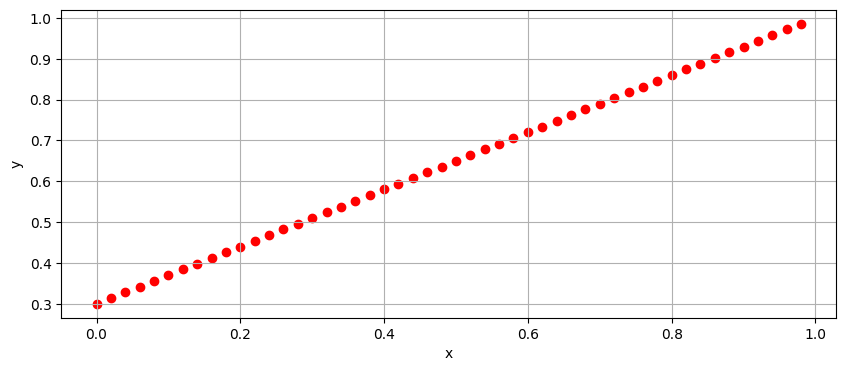

In [121]:
plt.figure(figsize=(10,4))
plt.scatter(x,y,color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [122]:
len(x),len(y)

(50, 50)

####train and test split:

In [123]:

train_split=int(0.8*len(x))
x_train,y_train=x[:train_split],y[:train_split]
x_test,y_test=x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [124]:
#better visualizization:


In [125]:
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    prediction=None):
  plt.figure(figsize=(10,7))
#plot the training data:
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
#plot the testing data:
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
#now if prediction:
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="Prediction")
  plt.legend(prop={"size":14})
  plt.show()

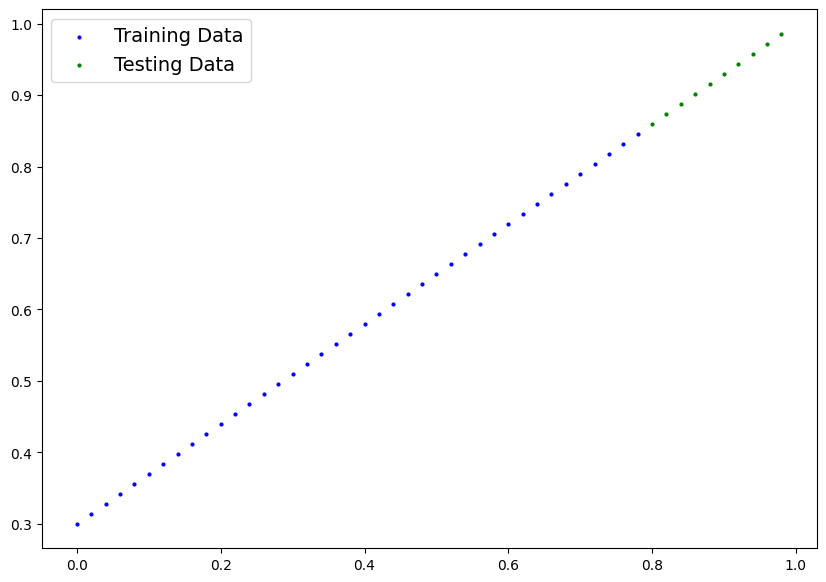

In [126]:
plot_prediction()

###creating our first pytorch model for linear regression:

What our model does:
1.start with the random value(weight & bias)
2.look at the training data and adjust the random values to better represent (or get closer to)the ideal values (weight & bias values we used to create the data)

How does it do it?
1.Gradient Descent
2.BackPropagation

A gradient tells us:

“How should we change the numbers inside the model (called weights) to make it better?”

Imagine you're climbing down a mountain in the fog, and you want to reach the lowest point (least error). The gradient is like a guide telling you:

*Which direction to step in

*How big of a step to take



In [127]:
import torch
from torch import nn
class linearRegression(nn.Module):#almost everything is inherited from nn.Module in pytorch...
  def __init__(self):
    super().__init__()
    #initailize the model parameters...
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bais=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    #forward method to define computation in the model..#any subclass of nn.Module require to override forward function....
  def forward(self,x:torch.Tensor)->torch.Tensor:#> torch.Tensor is a hint to the user (and tools) about what type of value the function will return.
    return self.weights*x+self.bais #this is the actual linear regreggression formula...

###pytorch model building essentials:

*torch.nn:basically contains all the building essentials for computational graphs(a neural network can be considered a computational graph)
*torch.nn.Parameters:what parameter our model should work on and try to learn.
*torch.nn.Module:The base class for all neutral network models,id we subclass it, you need to overwrite the forward method()
*torch.optim:This is where all the optimizers reside in pytorch,they will help with the gradient descent
*def forword():this method defines what happens in forward computation...  

In [128]:

#first we will create the random seed
random_seed=42
torch.manual_seed(random_seed)

#we will create the instance of the model
model_0=linearRegression()
list(model_0.parameters())#we can check our model parameters or what inside the model using .parameters()
model_0.state_dict()#to represent the parameter in form of dictionary...

OrderedDict([('weights', tensor([0.3367])), ('bais', tensor([0.1288]))])

In deep learning, we start with some random values (weights and biases), and by looking at the dataset, we try to adjust these values step-by-step to get closer to the ideal values that produce accurate predictions.

*This process of adjusting is done using:

*Loss function (to measure how wrong we are),

*Gradients (to know how to change the weights),

*and Optimizers (to actually update the weights).

In [129]:
#making prediction in our random model using inference mode:.inference_mode()will help us to run predictions faster..byb telling to only do prediction do not go for fitting or other stuff...
with torch.inference_mode():
  y_pred=model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

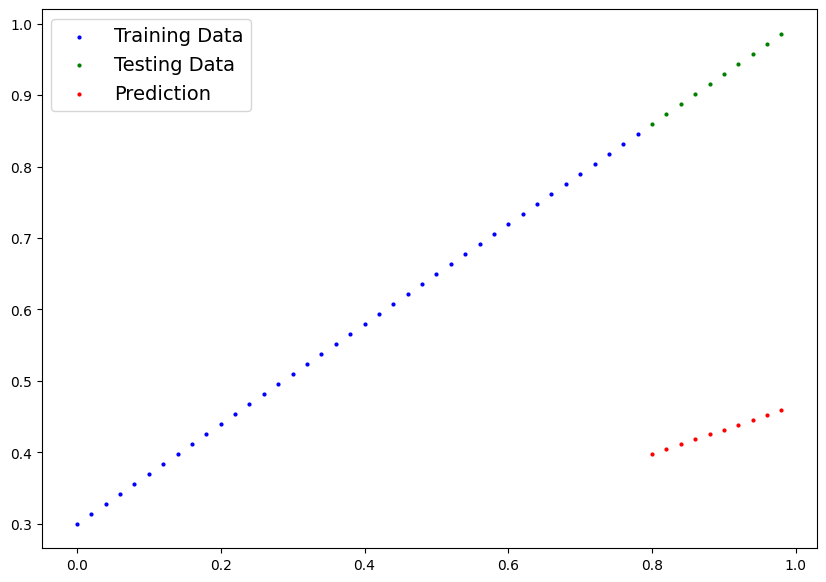

In [130]:
plot_prediction(prediction=y_pred)

###Training a Model Intuition:

In [131]:
#The Whole idea of training a model to move from some unknown parameters to some known parameters.
#in other words fro a poor representation to a better representation of data..

###ONE WAY TO MEASURE HOW POOR OR WRONG OUR MODEL IS PREDICTING IS USING LOSS FUNCTIONS:
#LOSS FUNCTION CAN BE ALSO CALLED AS COST FUNCTION OR CRITERION IN DIFFERENT AREAS:

THINGS WE NEED TO TRAIN:
1.LOSS FUNCTION:FUNCTION THAT IS USED TO DEFINE HOW WRONG OUR MODEL'S ARE TO THE ACTUAL IDEAL OUTPUTS,LOWER IS BETTER.
2.OPTIMIZER:TAKES INTO ACCOUNT THE LOSS OF A MODEL AND ADJUST THE MODEL PARAMETERS TO IMPROVE THE LOSS FUNCTION.

AND SPECIFICALLY FOR PYTORCH,WE NEED:
1.A TRAINING LOOP
2.A TESTING LOOP

In [132]:
#SETTING UP AN OPTIMIZER AND LOSS FUNCTION:
#L1LOSS:Creates a criterion that measures the mean absolute error (MAE) between each element in the input X AND TARGET VARIBALE Y.

#LOSS FUNCTION:
loss_function=nn.L1Loss()

#OPTIMIZER:
optimizer=torch.optim.SGD(params=model_0.parameters(),#param is the parameter we like to optimize....
                          lr=0.01)#learning rate is the rate at which optimizer will make changes in the model at a step...(hyperparameter are the parametrer we as machine learing engineer set for our model)


###Building a training loop and testing loop in pytorch :


In [133]:
#things we need to remember while working in loop:
#0.Loop through the data and do.....->
#1.Forward pass(this involves data moving through our models "forward function()" to make predictions on data- also called forward propagation)
#2.Calculate the loss (compare the forward pass predictions to ground truth labels)
#3.Optimizer zero grad
#4.loss backward- move backward through the network to calculate the gradients of each of the parameters of our model with respect to the loss(backpropagation)
#5.Optimizer step:use the optimizer to adjust our models paramters to try and improve the loss..(gradient decsent)

#to strore the loss function value:
epoch_count=[]
train_loss_value=[]
test_loss_value=[]

In [134]:
torch.manual_seed(42)
#An epoch is one loop throgh data:(this is a hypermeter because we set it...)
epochs=167
#TRAINING LOOP:
#0:loop throgh the data:
for epoch in range(epochs): #pass the data throgh the model for a number of epochs...
  #set the model to traiing mode:
  model_0.train()#traning mode in pytorch sets all parameters that requires gradient to require gradients(for low loss function we have to make gradients near to zero)

  #1.Forward pass:
  y_pred=model_0(x_train)#fprward pass on the training data using the forward method inside th training loop.#learns patterns...

  #2.Calculate the loss value using loss function:
  loss=loss_function(y_pred,y_train)#input first target next...
  print("Loss :",loss)

  #3.optimizer zero grad(zero the gradients of the optimizer):
  optimizer.zero_grad() #start fresh everytime...

  #4.loss backward(back Propagation) with respect to parameter of the model:
  loss.backward()

  #5.Optimizer Step (perform gradient descent) update the model parameter with respect to the gradient calculated by loss.backward():
  optimizer.step() #by default the optimizer will accumulate through the loop so..we have to zero them in above in step 3 for the next iteration of the loop...

###testing loop:
  model_0.eval() #truns off the different setting in the model not needed for evaluation/testing...
  with torch.inference_mode():
  #1.forward Pass:
    test_pred=model_0(x_test)
  #2.calculate the loss:
    test_loss=loss_function(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f"Epoch:{epoch} | Loss:{loss} |Test loss:{test_loss}")
    print(model_0.state_dict())

Loss : tensor(0.3129, grad_fn=<MeanBackward0>)
Epoch:0 | Loss:0.31288138031959534 |Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bais', tensor([0.1388]))])
Loss : tensor(0.3014, grad_fn=<MeanBackward0>)
Loss : tensor(0.2898, grad_fn=<MeanBackward0>)
Loss : tensor(0.2783, grad_fn=<MeanBackward0>)
Loss : tensor(0.2668, grad_fn=<MeanBackward0>)
Loss : tensor(0.2553, grad_fn=<MeanBackward0>)
Loss : tensor(0.2438, grad_fn=<MeanBackward0>)
Loss : tensor(0.2322, grad_fn=<MeanBackward0>)
Loss : tensor(0.2207, grad_fn=<MeanBackward0>)
Loss : tensor(0.2092, grad_fn=<MeanBackward0>)
Loss : tensor(0.1977, grad_fn=<MeanBackward0>)
Epoch:10 | Loss:0.1976713240146637 |Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bais', tensor([0.2388]))])
Loss : tensor(0.1862, grad_fn=<MeanBackward0>)
Loss : tensor(0.1746, grad_fn=<MeanBackward0>)
Loss : tensor(0.1631, grad_fn=<MeanBackward0>)
Loss : tensor(0.1516, grad_fn=<MeanBackward0>)
Loss : tensor(0.14

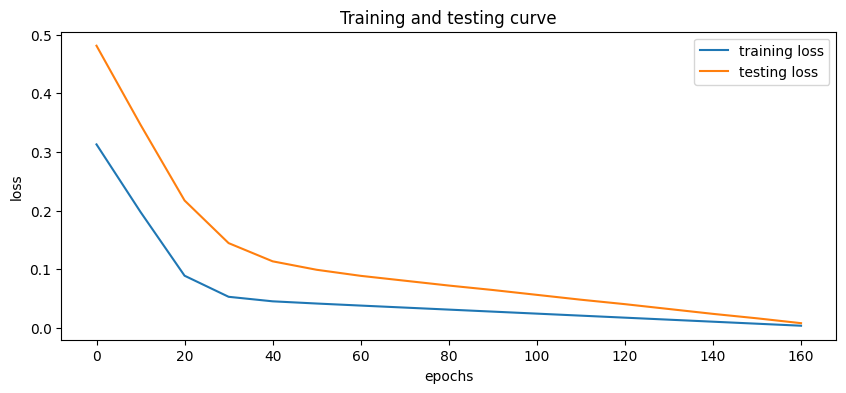

In [141]:
import numpy as np
plt.figure(figsize=(10,4))
plt.plot(epoch_count,np.array(torch.tensor(train_loss_value).cpu().numpy()),label="training loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_value).cpu().numpy()),label="testing loss")
plt.title("Training and testing curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [135]:
with torch.inference_mode():#truns off gradient tracking:
  y_pred=model_0(x_test)
y_pred

tensor([[0.8570],
        [0.8709],
        [0.8847],
        [0.8986],
        [0.9124],
        [0.9263],
        [0.9401],
        [0.9540],
        [0.9678],
        [0.9817]])

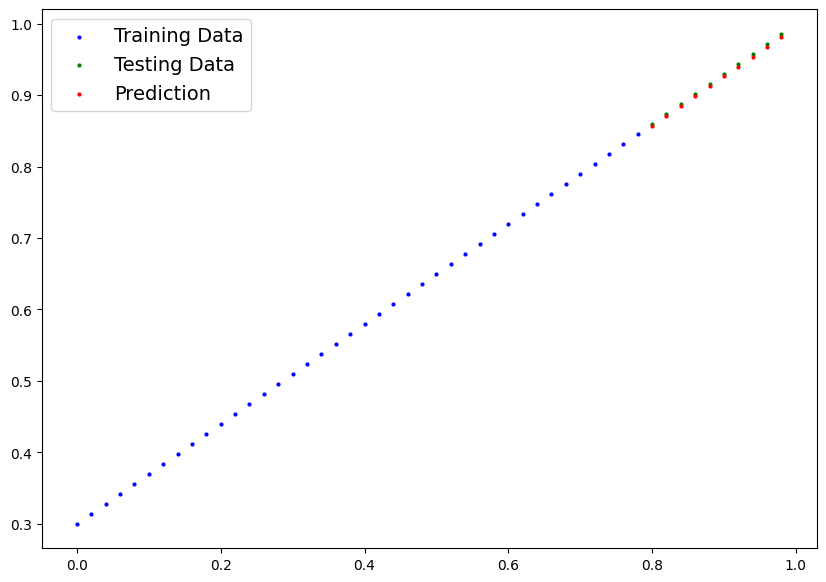

In [136]:
plot_prediction(prediction=y_pred)

In [137]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6927])), ('bais', tensor([0.3028]))])

###save our model:


In [142]:
#there are three main methods that is needed for and loading models in pytorch.
#1.'torch.save()'- allows us to save our pytorch object in python's pickle format.
#2.'torch.load()'- allow us to load a saved pytorch object.
#3.'torch.nn.Module.load_state_dict()'- this allow us to load a model's saved state dictionary..
#Method	Pros	Cons
#torch.save(model)	Simple, saves everything	Not portable, breaks if code changes or moves
#torch.save(model.state_dict())	Robust, portable, avoids pickle issues, more common	Requires re-defining the model class before loading

#import to load and save:
from pathlib import Path
#1.create the directory:
Model_dic=Path("models")
Model_dic.mkdir(parents=True,exist_ok=True)

#2.cresting the path:
model_name="first_pytorch_model.pth"
#now in which sytax:
model_save_path=Model_dic/model_name

#3.save the model:
torch.save(obj=model_0.state_dict(),f=model_save_path)


###load our model:

In [144]:
#we will create a new instance of our class model and load the saved state_dict() into it...
#create a new instance:
loaded_model=linearRegression()
#load the saved state_dict:
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6927])), ('bais', tensor([0.3028]))])

In [148]:
#making some prediction with loaded model:
loaded_model.eval()
with torch.inference_mode():
  y_pred_load=loaded_model(x_test)
y_pred_load

tensor([[0.8570],
        [0.8709],
        [0.8847],
        [0.8986],
        [0.9124],
        [0.9263],
        [0.9401],
        [0.9540],
        [0.9678],
        [0.9817]])

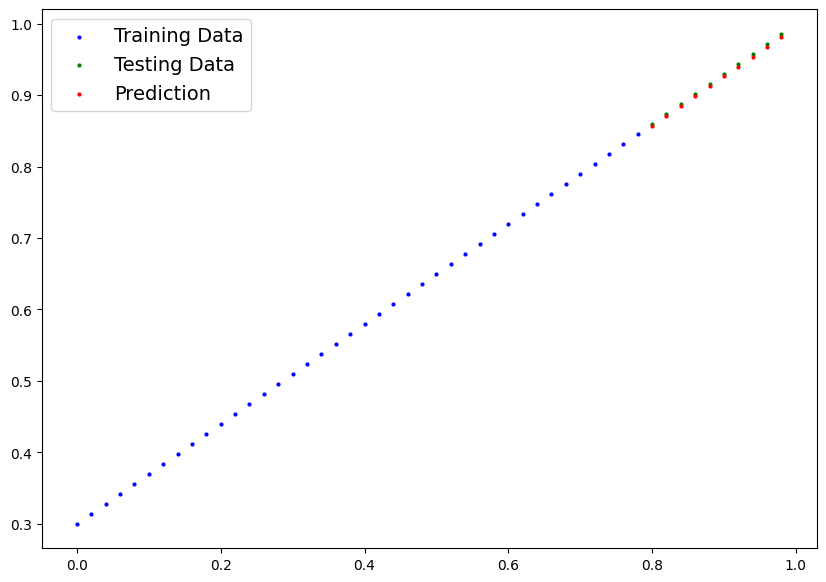

In [149]:
plot_prediction(prediction=y_pred)

In [150]:
y_pred== y_pred_load

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])